# Importing Modules

In [1]:
pip install itertools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [1]:
# Importing pandas and numpy for basic algebra and data processing
import pandas as pd
import numpy as np

# To work with files, we import os package
import os

# For data visualisation, importing seaborn and matplotlib
import matplotlib.pylab as plt
import seaborn as sns

# For audio library files, importing librosa
import librosa as lr
import librosa.display
from IPython.display import Audio
import glob
import speech_recognition as sr

import warnings 
warnings.filterwarnings('ignore')

from itertools import cycle
import time

import tensorflow as tf

In [16]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

#defined tess emotions to test on TESS dataset only
tess_emotions=['angry','disgust','fear','ps','happy','sad']

##defined RAVDESS emotions to test on RAVDESS dataset only
ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']

observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

In [17]:
def dataset_options():
    # choose datasets
    ravdess = True
    tess = True
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print(data)
    return data

# Loading the dataset


In [27]:
def load_data(test_size=0.2): 
    x,y=[],[]
    
    # feature to extract
    mfcc = True
    
    data = dataset_options()
    paths = []
    if data['ravdess']:
        paths.append("..\SpeechEmotionRecognition\RAVDESSDataset\Actor_*\*.wav")
    elif data['ravdess_speech']:
        paths.append("..\Datasets\RAVDESS\Speech\Actor_*\*.wav")
    elif data['ravdess_song']:
        paths.append("..\Datasets\RAVDESS\Song\Actor_*\*.wav")
        
    for path in paths:
        for file in glob.glob(path):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion according to filename. dictionary emotions is defined above.
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    if data['tess']:
        for file in glob.glob("..\Datasets\TESS\*AF_*\*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    return {"X":x,"y":y}

In [26]:
def extract_feature(file_name, mfcc):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    return result

In [24]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
#     if chroma:
#         stft=np.abs(librosa.stft(X))
#     result=np.array([])
#     if mfcc:
#         mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#         result=np.hstack((result, mfccs))
#     if chroma:
#         chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#         result=np.hstack((result, chroma))
#     if mel:
#         mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#         result=np.hstack((result, mel))
#     return result

In [29]:
start_time = time.time()

Trial_dict = load_data(test_size = 0.3)

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': True}


UnboundLocalError: local variable 'result' referenced before assignment

In [2]:
files1=glob('../SpeechEmotionRecognition/RAVDESSDataset/*/*.wav')
files2=glob('../SpeechEmotionRecognition/TESSDataset/*/*.wav')
audio_files=files1+files2
# print(audio_files)
len(audio_files)

4240

In [92]:
emotion=[]
path=[]
duration=[]
for f in audio_files:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)


NameError: name 'TESS' is not defined

In [2]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

<AxesSubplot:>

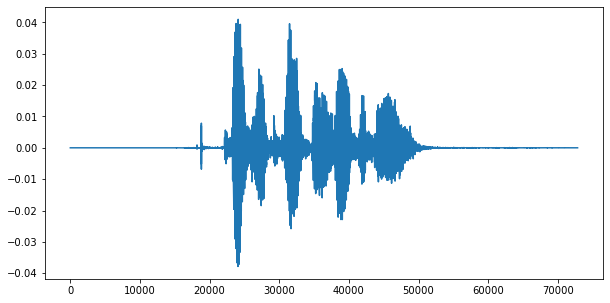

In [5]:
y,sr=lr.load(audio_files[0])
pd.Series(y).plot(figsize=(10,5))

<AxesSubplot:title={'center':'Raw Audio Trimmed Example'}>

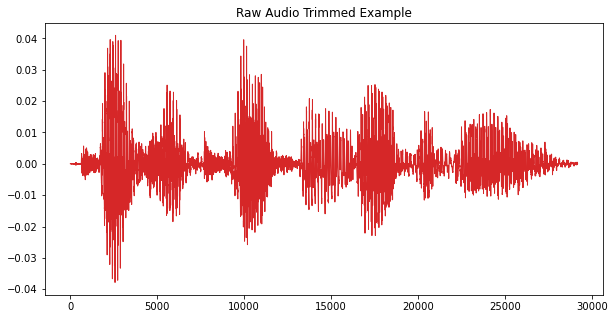

In [6]:
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
yTrimmed, _= lr.effects.trim(y,top_db=30)
pd.Series(yTrimmed).plot(figsize=(10,5),
                        lw=1,
                        title='Raw Audio Trimmed Example',
                        color='tab:red')

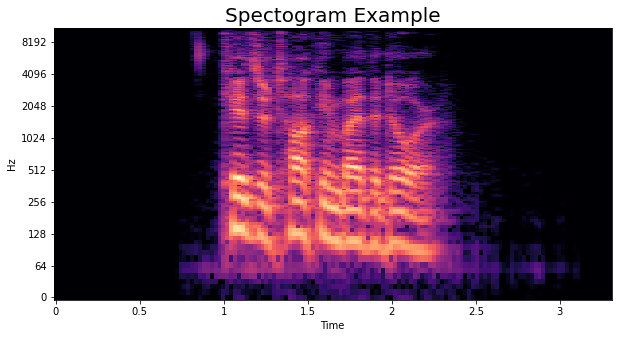

In [12]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
plt.show()

In [2]:
print(tf.__version__)

2.10.0
